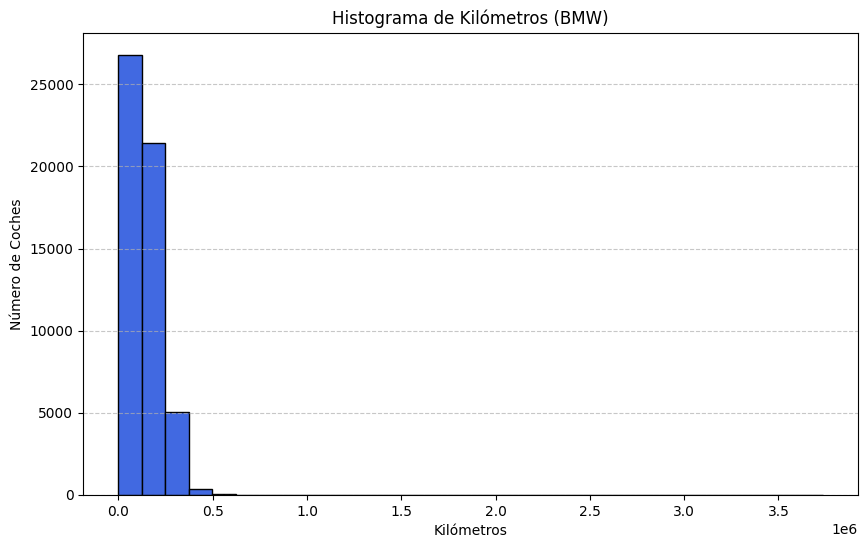

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "202412_CochesLimpio.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filtrar coches BMW y graficar histograma
df_bmw = df[df["Marca"].str.lower() == "bmw"]
plt.figure(figsize=(10, 6))
plt.hist(df_bmw["Kilometros"], bins=30, color="royalblue", edgecolor="black")
plt.xlabel("Kilómetros")
plt.ylabel("Número de Coches")
plt.title("Histograma de Kilómetros (BMW)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

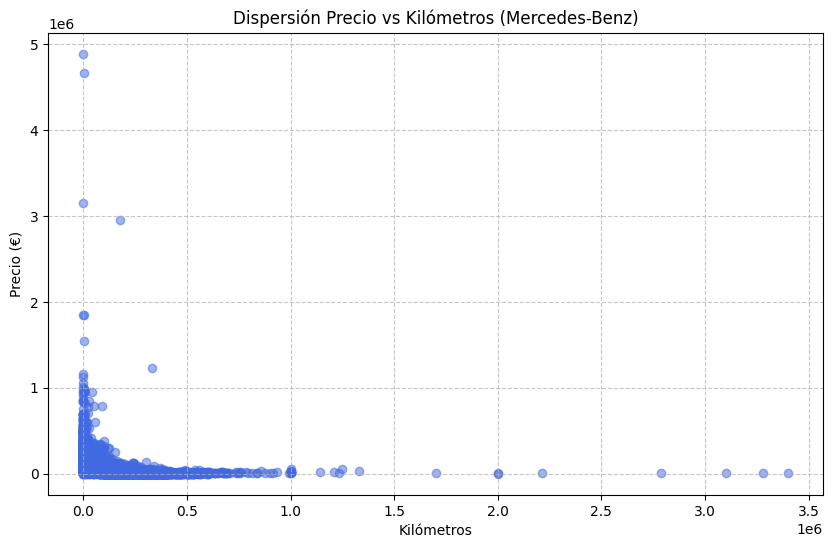

In [13]:
# Filtrar coches Mercedes-Benz y graficar scatterplot
df_mercedes = df[df["Marca"].str.lower() == "mercedes-benz"]
plt.figure(figsize=(10, 6))
plt.scatter(df_mercedes["Kilometros"], df_mercedes["Precio"], alpha=0.5, color="royalblue")
plt.xlabel("Kilómetros")
plt.ylabel("Precio (€)")
plt.title("Dispersión Precio vs Kilómetros (Mercedes-Benz)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

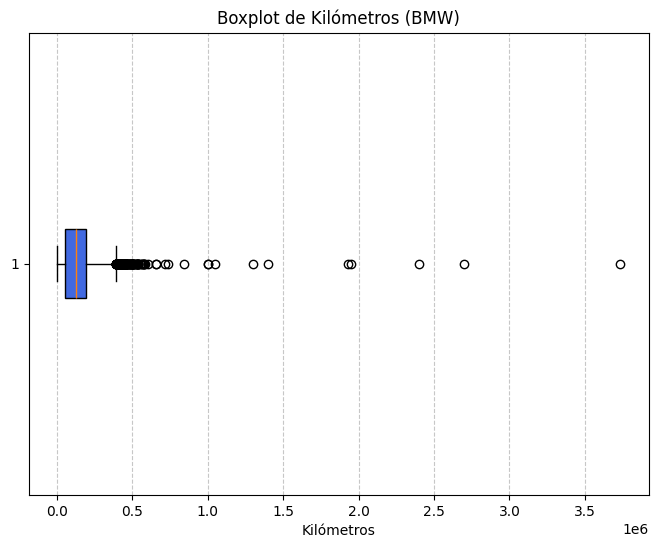

In [14]:
# Diagrama de cajas para los kilómetros de BMW
plt.figure(figsize=(8, 6))
plt.boxplot(df_bmw["Kilometros"], vert=False, patch_artist=True, boxprops=dict(facecolor="royalblue"))
plt.xlabel("Kilómetros")
plt.title("Boxplot de Kilómetros (BMW)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

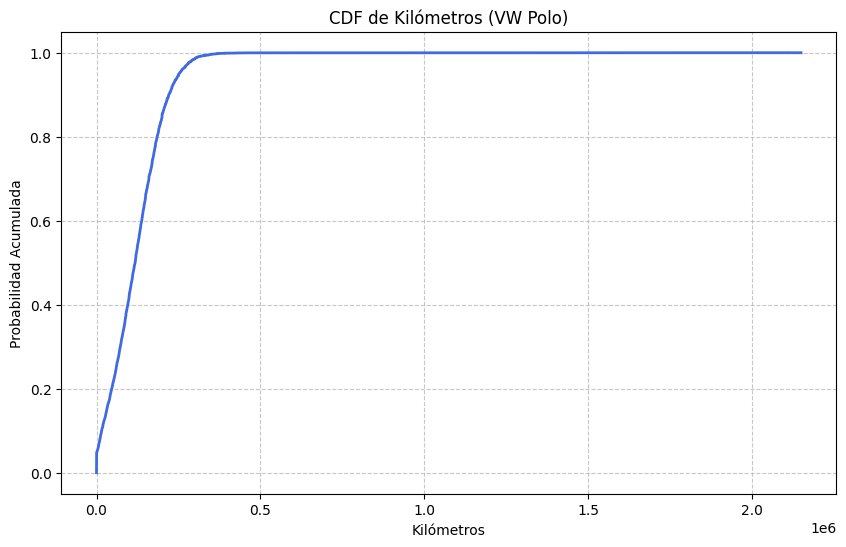

In [15]:
import numpy as np
# Filtrar coches VW Polo
df_vw_polo = df[(df["Marca"].str.lower() == "volkswagen") & (df["Modelo"].str.lower() == "polo")]
sorted_kms = np.sort(df_vw_polo["Kilometros"])
cdf = np.arange(1, len(sorted_kms) + 1) / len(sorted_kms)
plt.figure(figsize=(10, 6))
plt.plot(sorted_kms, cdf, color="royalblue", linewidth=2)
plt.xlabel("Kilómetros")
plt.ylabel("Probabilidad Acumulada")
plt.title("CDF de Kilómetros (VW Polo)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

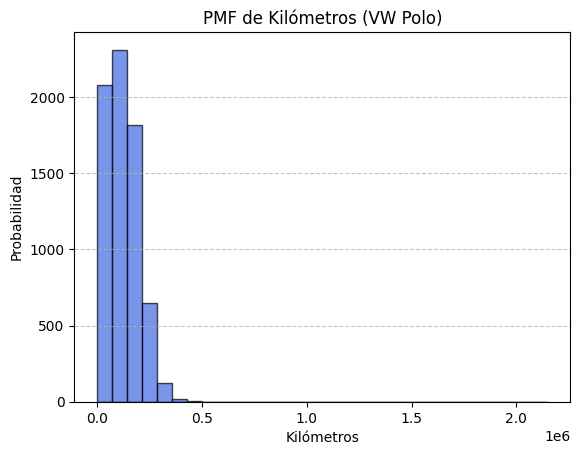

In [16]:
# Calcular y graficar la PMF para VW Polo
counts, bins, _ = plt.hist(df_vw_polo["Kilometros"], bins=30, density=False, color="royalblue", edgecolor="black", alpha=0.7)
probabilities = counts / counts.sum()
plt.bar(bins[:-1], probabilities, width=np.diff(bins), align='edge', color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("Kilómetros")
plt.ylabel("Probabilidad")
plt.title("PMF de Kilómetros (VW Polo)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

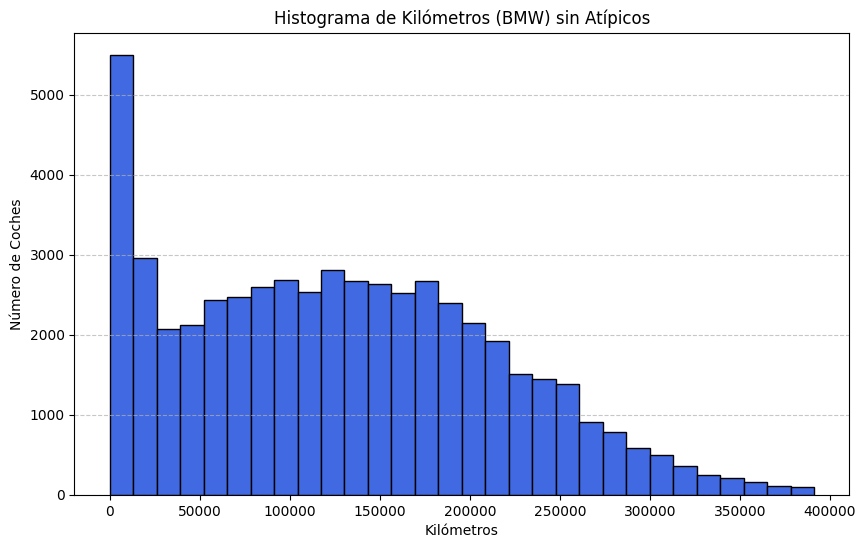

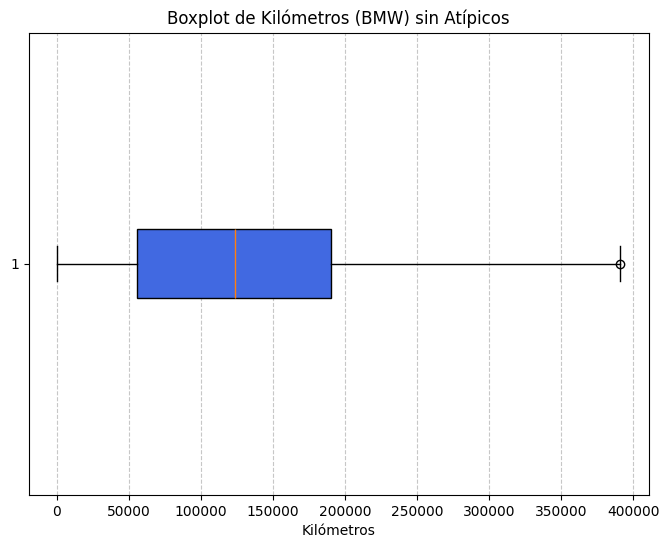

In [17]:
# Calcular y eliminar outliers basados en el IQR para BMW
Q1 = df_bmw["Kilometros"].quantile(0.25)
Q3 = df_bmw["Kilometros"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos sin atípicos
df_bmw_clean = df_bmw[(df_bmw["Kilometros"] >= lower_bound) & (df_bmw["Kilometros"] <= upper_bound)]

# Histograma sin atípicos
plt.figure(figsize=(10, 6))
plt.hist(df_bmw_clean["Kilometros"], bins=30, color="royalblue", edgecolor="black")
plt.xlabel("Kilómetros")
plt.ylabel("Número de Coches")
plt.title("Histograma de Kilómetros (BMW) sin Atípicos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Boxplot sin atípicos
plt.figure(figsize=(8, 6))
plt.boxplot(df_bmw_clean["Kilometros"], vert=False, patch_artist=True, boxprops=dict(facecolor="royalblue"))
plt.xlabel("Kilómetros")
plt.title("Boxplot de Kilómetros (BMW) sin Atípicos")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()